In [4]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas de ajuda
import numpy as np
import matplotlib.pyplot as plt


# Importando Dataset

In [114]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [79]:
# Labels
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [80]:
x_train.shape

(50000, 32, 32, 3)

In [81]:
y_train.shape

(50000, 1)

In [82]:
x_test.shape

(10000, 32, 32, 3)

In [83]:
y_test.shape

(10000, 1)

In [84]:
# Pre Processamento das Imagens

In [85]:
y_train[0]

array([6], dtype=uint8)

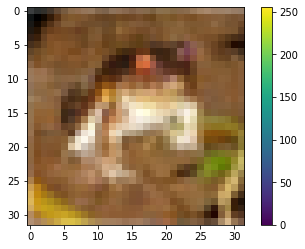

In [87]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [93]:
# # Normalizando imagens
# # x_train = x_train[::0] / 255.0
# for i in range(3):
#     x_train[:,:,:,i] = x_train[:,:,:,i] / 255
# # x_train[:,:,1] = x_train[:,:,1] / 255.0
# # x_train[:,:,2] = x_train[:,:,2] / 255.0
# # test_images = test_images / 255.0
# x_train[0]
y_train[0][0]

6

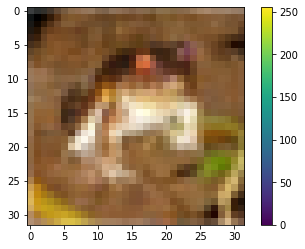

In [89]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

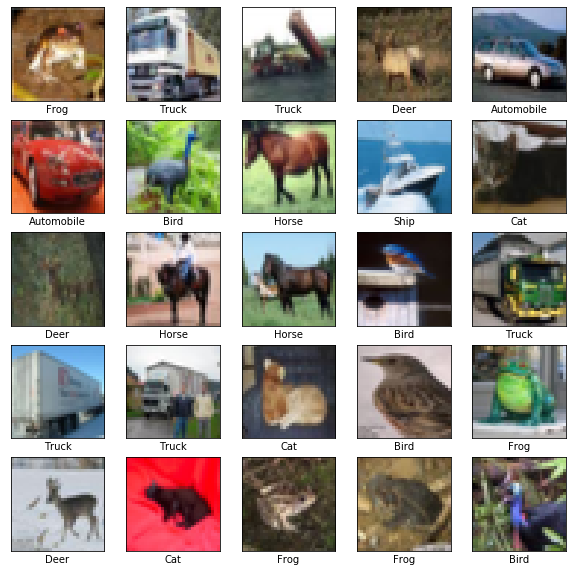

In [115]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Criação do Modelo

In [118]:
# Criando o Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [119]:
# Compilar Modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar Modelo

In [120]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.5959 - acc: 0.4299
Epoch 2/10
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.1599 - acc: 0.5910
Epoch 3/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.0151 - acc: 0.6457
Epoch 4/10
50000/50000 [==============================] - 105s 2ms/sample - loss: 0.9353 - acc: 0.6735
Epoch 5/10
50000/50000 [==============================] - 109s 2ms/sample - loss: 0.8647 - acc: 0.7013
Epoch 6/10
50000/50000 [==============================] - 102s 2ms/sample - loss: 0.8184 - acc: 0.7168
Epoch 7/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.7662 - acc: 0.7340
Epoch 8/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.7332 - acc: 0.7457
Epoch 9/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.6998 - acc: 0.7567
Epoch 10/10
50000/50000 [==============================] - 104s 2ms/sampl

In [122]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 414us/sample - loss: 0.8129 - acc: 0.7272
Test accuracy: 0.7272
